In [1]:
import pandas as pd

In [4]:
df=pd.read_csv(r"C:\Users\laksh\Downloads\cleaned_data.csv")

In [8]:
df.columns

Index(['Date', 'Description', 'Category', 'Cost', 'Person_spent', 'Year',
       'Month', 'Day'],
      dtype='object')

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

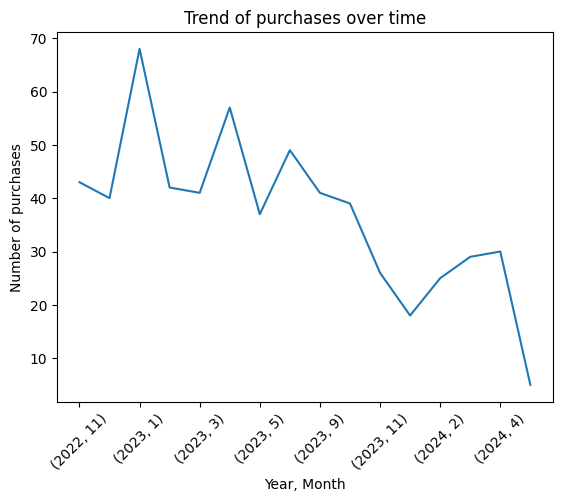

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trend of purchases over time by month and year
df.groupby(['Year', 'Month']).count()['Cost'].plot()
plt.title('Trend of purchases over time')
plt.xlabel('Year, Month')
plt.ylabel('Number of purchases')
plt.xticks(rotation=45)
plt.show()

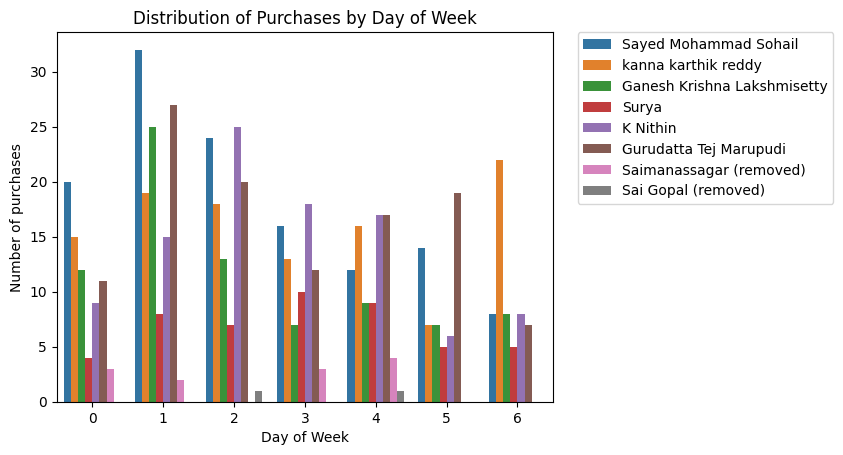

In [14]:
# Distribution of calls throughout the week
df['DayOfWeek'] = df['Date'].dt.dayofweek
sns.countplot(x='DayOfWeek', data=df, hue='Person_spent')
plt.title('Distribution of Purchases by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of purchases')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Above shows that purchases were mostly made on  tuesday, wednesday, and Kannakarthik purchasing more on sunday

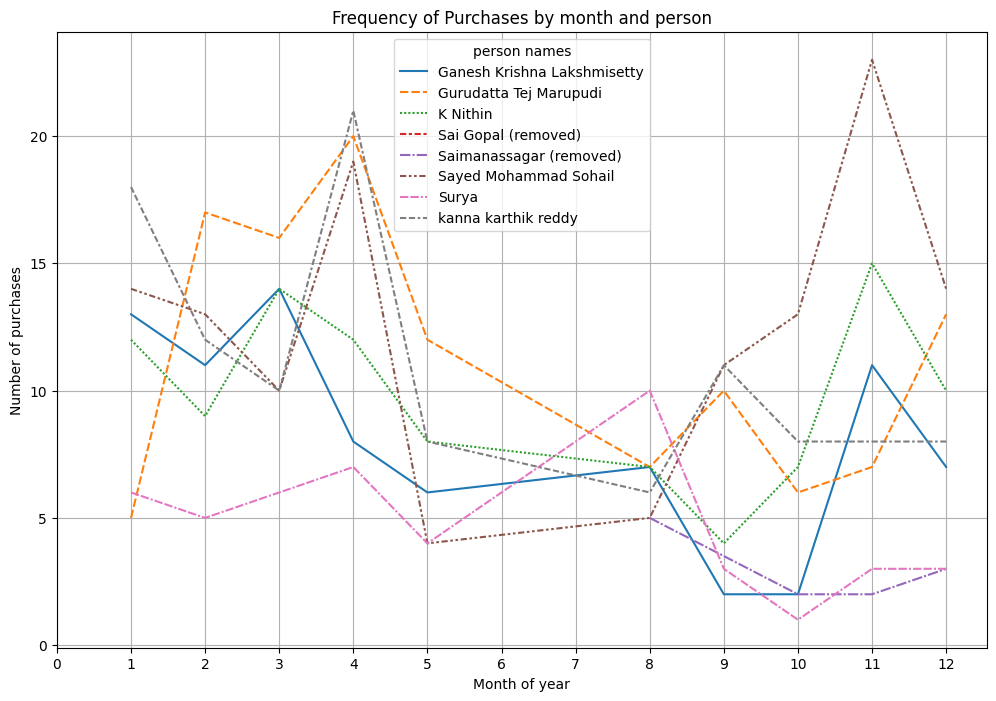

In [27]:


hourly_calls = df.groupby(['Month', 'Person_spent']).count()['Cost'].unstack()

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=hourly_calls)
plt.title('Frequency of Purchases by month and person')
plt.xlabel('Month of year')
plt.ylabel('Number of purchases')
plt.legend(title='person names')
plt.xticks(range(0, 13))  # Ensure x-axis ticks represent each hour of the day
plt.grid(True)
plt.show()


C:\Users\laksh\AppData\Local\Temp\ipykernel_4708\580920593.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_spend, x='Person_spent', y='Cost', palette='viridis')


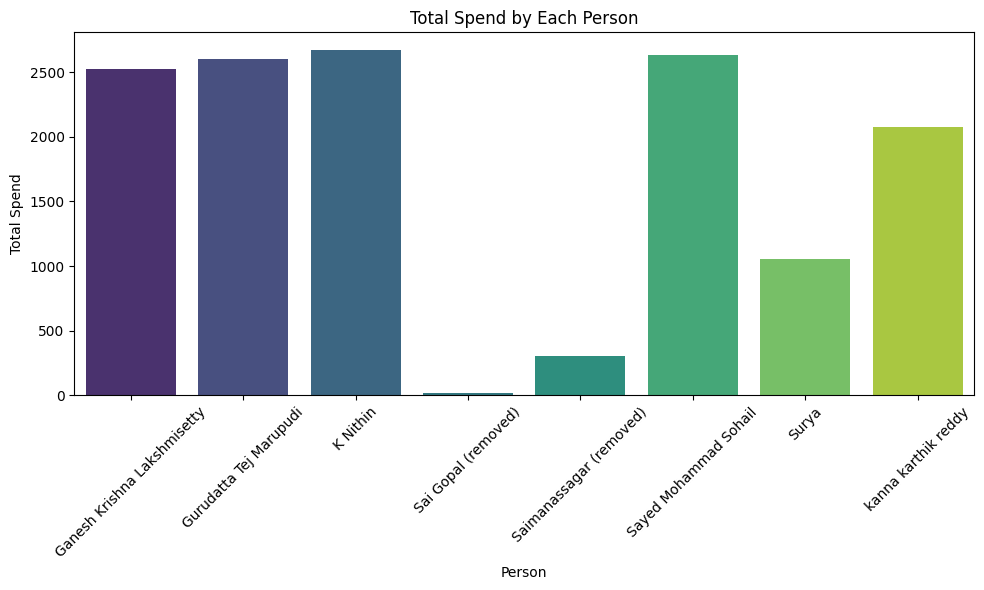

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


total_spend = df.groupby('Person_spent')['Cost'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=total_spend, x='Person_spent', y='Cost', palette='viridis')
plt.title('Total Spend by Each Person')
plt.xlabel('Person')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### who purchased most ? 1. Sohail & Nithin , 2. Guru, 3.Ganesh , 4.Kanna, 5.Surya, 6.Manas, 7. Sai Gopal

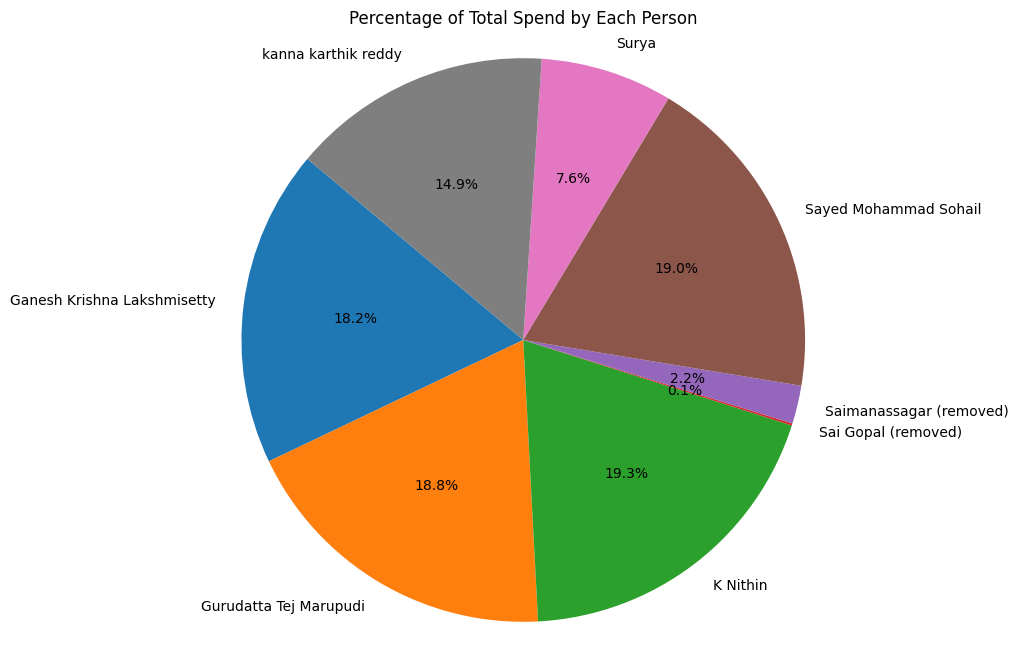

In [29]:
# Plot
plt.figure(figsize=(8, 8))
plt.pie(total_spend['Cost'], labels=total_spend['Person_spent'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Spend by Each Person')
plt.axis('equal')
plt.show()


C:\Users\laksh\AppData\Local\Temp\ipykernel_4708\1817910976.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Person_spent', y='Cost', palette='viridis')


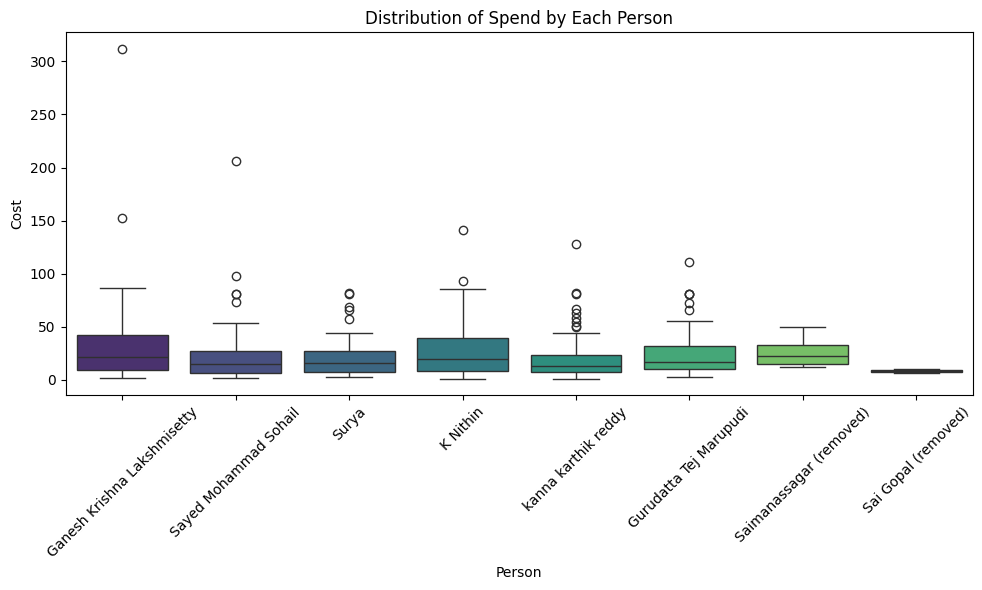

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Person_spent', y='Cost', palette='viridis')
plt.title('Distribution of Spend by Each Person')
plt.xlabel('Person')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\laksh\AppData\Local\Temp\ipykernel_4708\1018374717.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Person_spent', y='Cost', palette='viridis')


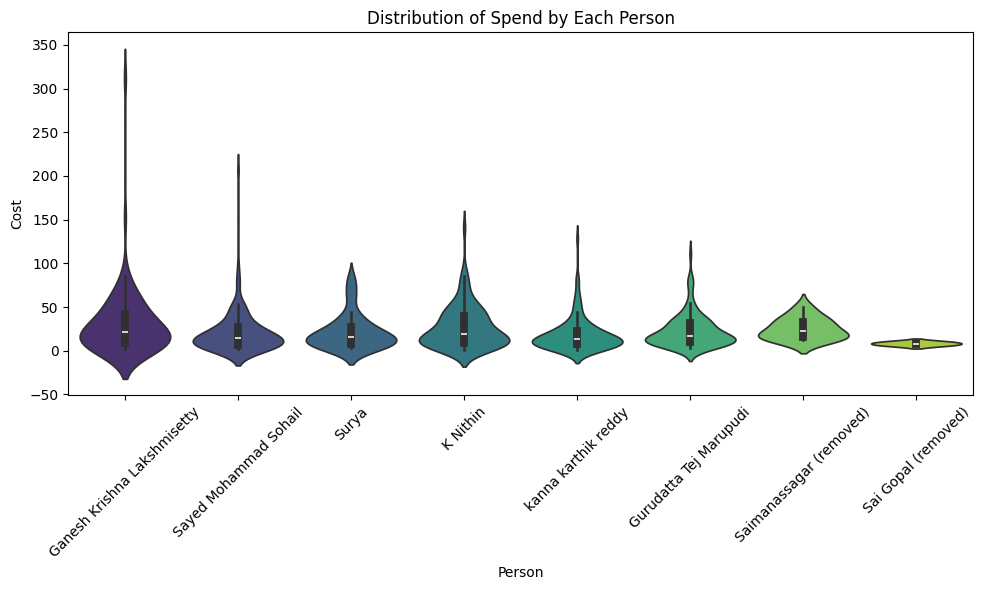

In [31]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Person_spent', y='Cost', palette='viridis')
plt.title('Distribution of Spend by Each Person')
plt.xlabel('Person')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Above shows huge amount purchases were made by Ganesh, then sohail, followed by Nithin, Kanna, Guru, Surya

In [32]:
df.head(3)

,Date,Description,Category,Cost,Person_spent,Year,Month,Day,DayOfWeek
0,2022-11-02,Halal Chicken,Groceries,21.78,Ganesh Krishna Lakshmisetty,2022,11,2,2
1,2022-11-03,American Fast Foods,General,5.19,Sayed Mohammad Sohail,2022,11,3,3
2,2022-11-03,Uber_and_Lyft,Taxi,9.66,Surya,2022,11,3,3


## lets explore per categories

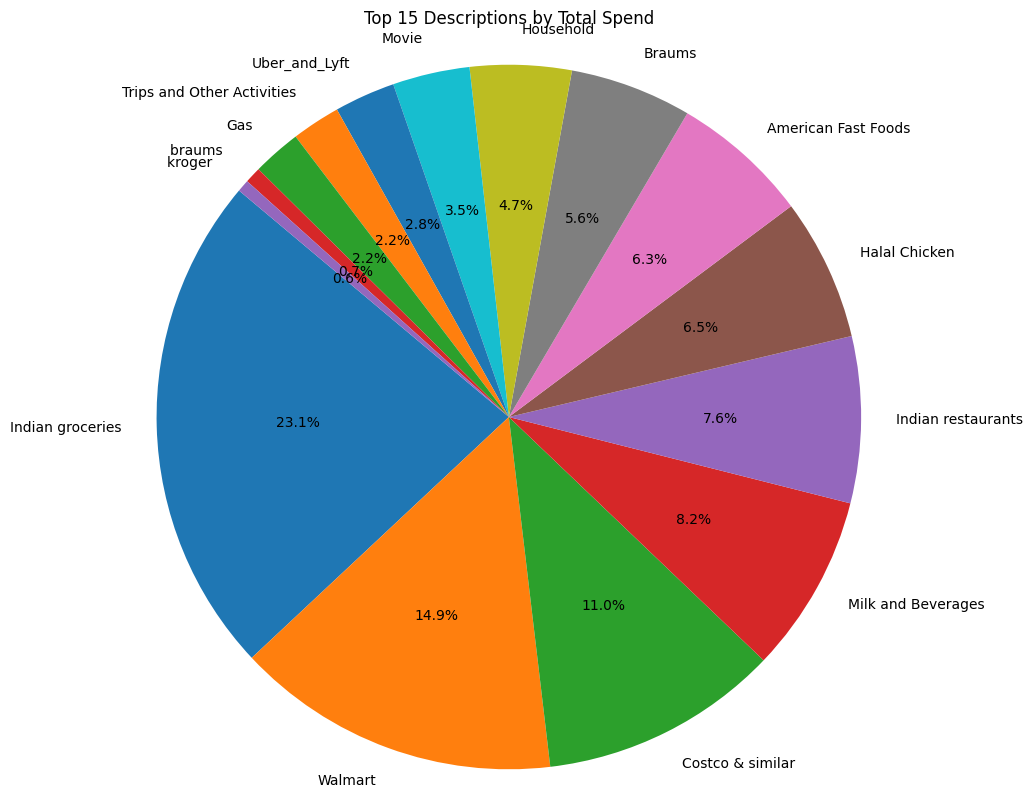

In [35]:

top_descriptions = df['Description'].value_counts().head(15)

plt.figure(figsize=(10, 10))
plt.pie(top_descriptions, labels=top_descriptions.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 15 Descriptions by Total Spend')
plt.show()


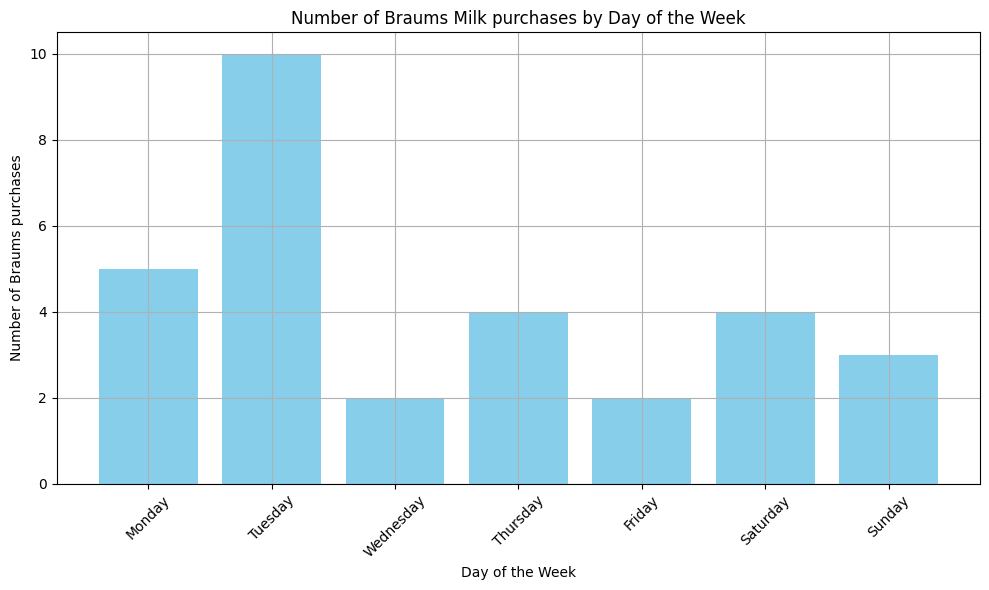

In [49]:


df['Day_of_Week'] = df['Date'].dt.day_name()


movie_days = df[df['Description'] == 'Braums'].groupby('Day_of_Week').size().reset_index(name='Count')


weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
movie_days['Day_of_Week'] = pd.Categorical(movie_days['Day_of_Week'], categories=weekdays, ordered=True)
movie_days = movie_days.sort_values('Day_of_Week')
plt.figure(figsize=(10, 6))
plt.bar(movie_days['Day_of_Week'], movie_days['Count'], color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Braums purchases')
plt.title('Number of Braums Milk purchases by Day of the Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


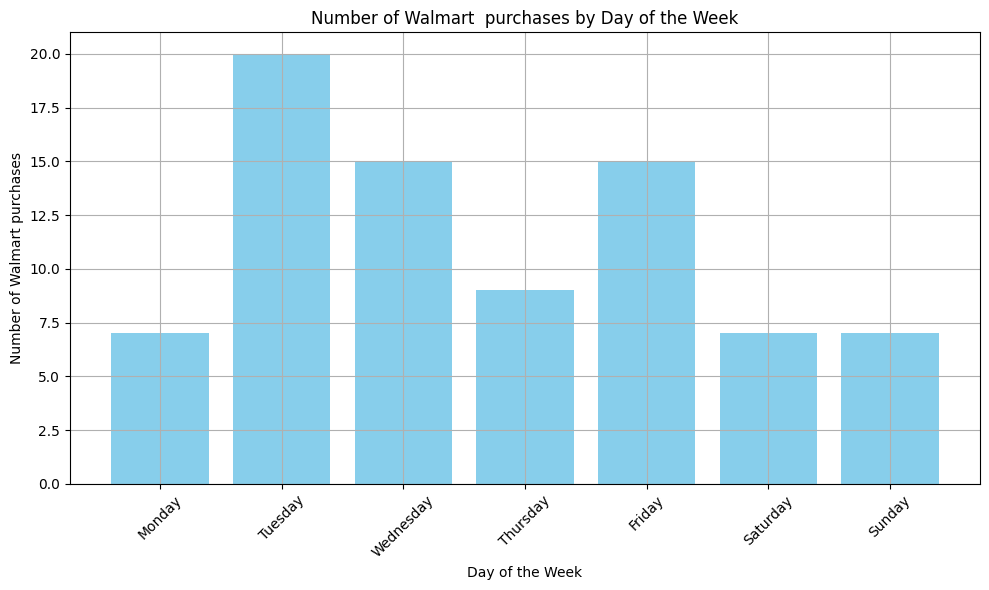

In [48]:


df['Day_of_Week'] = df['Date'].dt.day_name()


movie_days = df[df['Description'] == 'Walmart'].groupby('Day_of_Week').size().reset_index(name='Count')


weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
movie_days['Day_of_Week'] = pd.Categorical(movie_days['Day_of_Week'], categories=weekdays, ordered=True)
movie_days = movie_days.sort_values('Day_of_Week')
plt.figure(figsize=(10, 6))
plt.bar(movie_days['Day_of_Week'], movie_days['Count'], color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Walmart purchases')
plt.title('Number of Walmart  purchases by Day of the Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


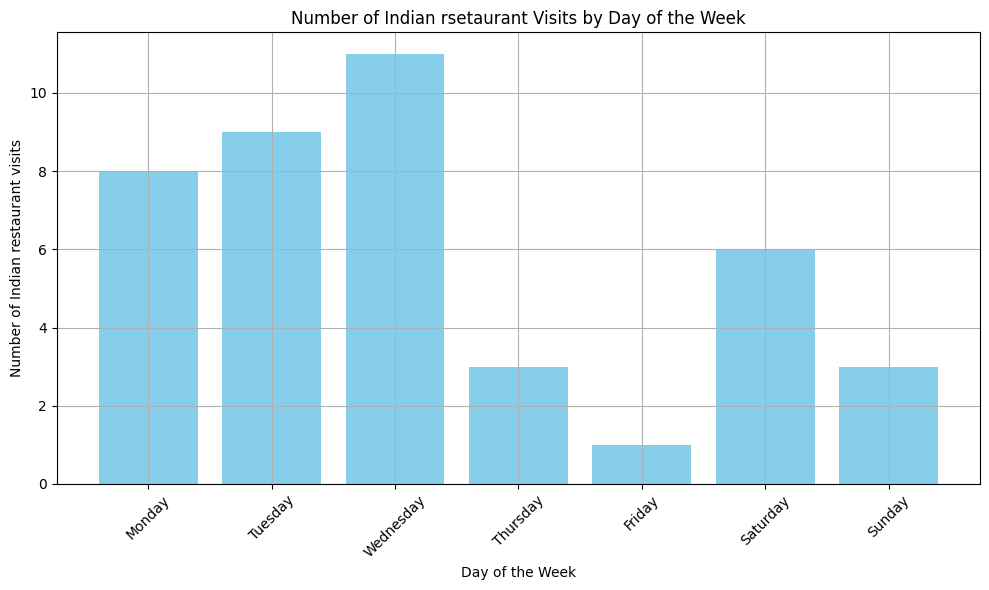

In [47]:


df['Day_of_Week'] = df['Date'].dt.day_name()


movie_days = df[df['Description'] == 'Indian restaurants'].groupby('Day_of_Week').size().reset_index(name='Count')


weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
movie_days['Day_of_Week'] = pd.Categorical(movie_days['Day_of_Week'], categories=weekdays, ordered=True)
movie_days = movie_days.sort_values('Day_of_Week')
plt.figure(figsize=(10, 6))
plt.bar(movie_days['Day_of_Week'], movie_days['Count'], color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Indian restaurant visits')
plt.title('Number of Indian rsetaurant Visits by Day of the Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## observation: weekends seem to be off in most of the cases

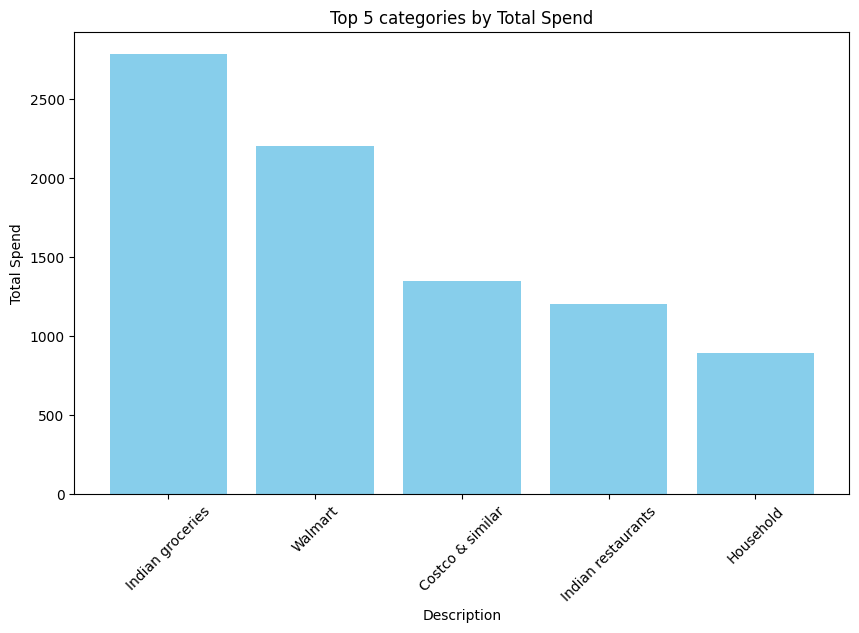

In [61]:
total_spend_description = df.groupby('Description')['Cost'].sum().reset_index()
top_5_descriptions = total_spend_description.nlargest(5, 'Cost')

plt.figure(figsize=(10, 6))
plt.bar(top_5_descriptions['Description'], top_5_descriptions['Cost'], color='skyblue')
plt.xlabel('Description')
plt.ylabel('Total Spend')
plt.title('Top 5 categories by Total Spend')
plt.xticks(rotation=45)
plt.show()



C:\Users\laksh\AppData\Local\Temp\ipykernel_4708\2397177519.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_5_descriptions_sum, x='Description', y='Cost', hue='Person_spent', palette='tab10', ci=None)


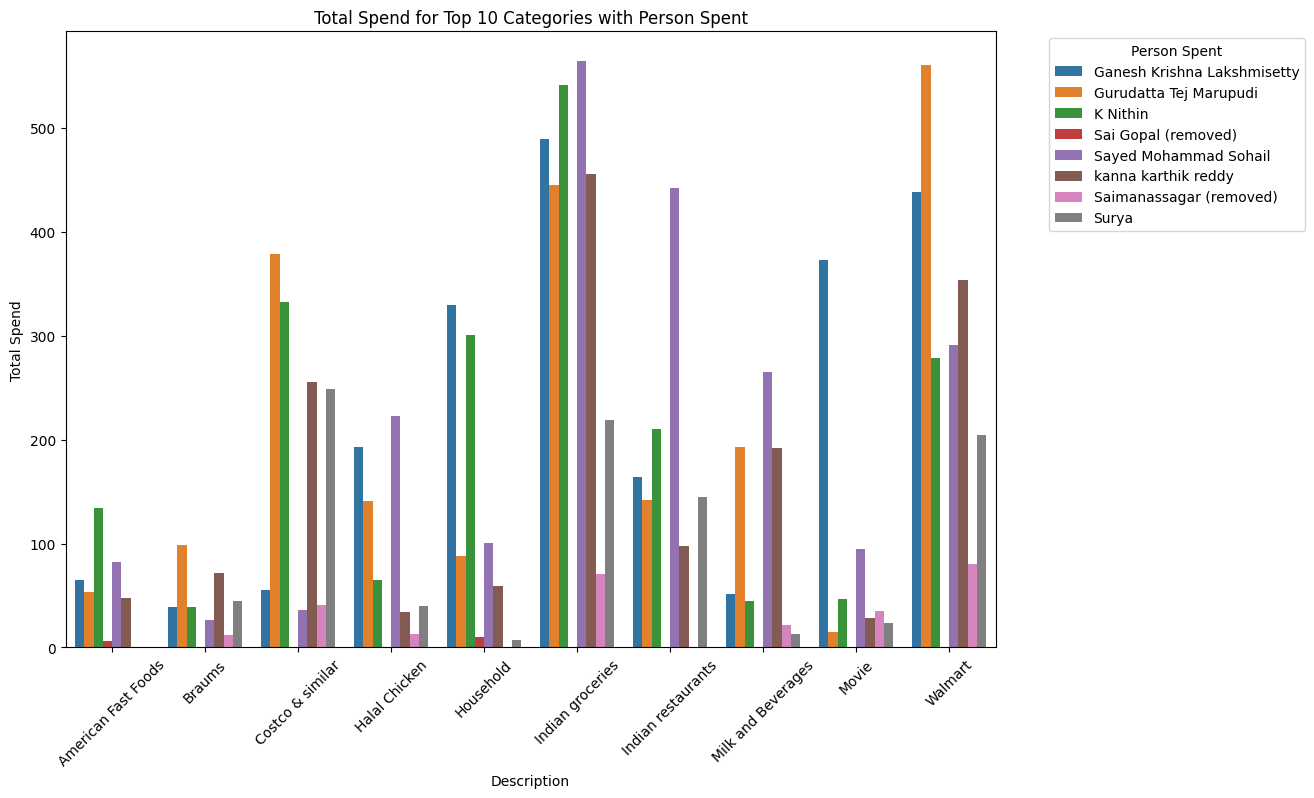

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate total sum of purchases for each description
top_5_descriptions = df['Description'].value_counts().head(10).index
top_5_descriptions_data = df[df['Description'].isin(top_5_descriptions)]
top_5_descriptions_sum = top_5_descriptions_data.groupby(['Description', 'Person_spent'])['Cost'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_descriptions_sum, x='Description', y='Cost', hue='Person_spent', palette='tab10', ci=None)
plt.title('Total Spend for Top 10 Categories with Person Spent')
plt.xlabel('Description')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)
plt.legend(title='Person Spent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## OBSERVATIONS
### GURU LEADS IN COSTCO, AND WALMART
### SOHAIL LEADS IN INDIAN RESTAURANTS MAJORLY
### GANESH LEADS IN MOVIES MAJORLY AND HOUSEHOLD PURCHASES
### MOST OF EM CONTRIBUTED WELL FOR INDIAN GROCERIES

In [63]:
df.head(2)

,Date,Description,Category,Cost,Person_spent,Year,Month,Day,DayOfWeek,Day_of_Week
0,2022-11-02,Halal Chicken,Groceries,21.78,Ganesh Krishna Lakshmisetty,2022,11,2,2,Wednesday
1,2022-11-03,American Fast Foods,General,5.19,Sayed Mohammad Sohail,2022,11,3,3,Thursday


In [79]:
df.describe()

,Date,Cost,Year,Month,Day,DayOfWeek
count,590,590.000000,590.000000,590.000000,590.000000,590.000000
mean,2023-06-21 07:09:33.559322112,23.524458,2023.010169,6.061017,15.218644,2.642373
min,2022-11-02 00:00:00,1.000000,2022.000000,1.000000,1.000000,0.000000
25%,2023-01-29 00:00:00,8.492500,2023.000000,3.000000,8.000000,1.000000
50%,2023-05-02 12:00:00,15.980000,2023.000000,5.000000,15.000000,2.000000
75%,2023-10-17 00:00:00,30.860000,2023.000000,10.000000,24.000000,4.000000
max,2024-05-01 00:00:00,311.760000,2024.000000,12.000000,31.000000,6.000000
std,NaN,25.266363,0.540293,3.863504,8.978449,1.865394


## VISUALIZING YEARLY SALES

C:\Users\laksh\AppData\Local\Temp\ipykernel_4708\3944961205.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly, x='Year', y='Cost', palette='viridis')


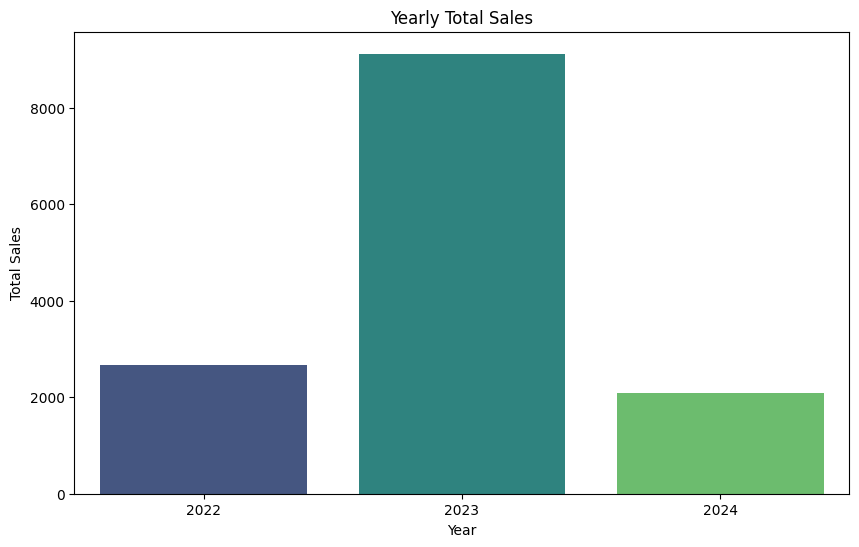

In [80]:
yearly = df.groupby('Year')['Cost'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly, x='Year', y='Cost', palette='viridis')
plt.title('Yearly Total Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


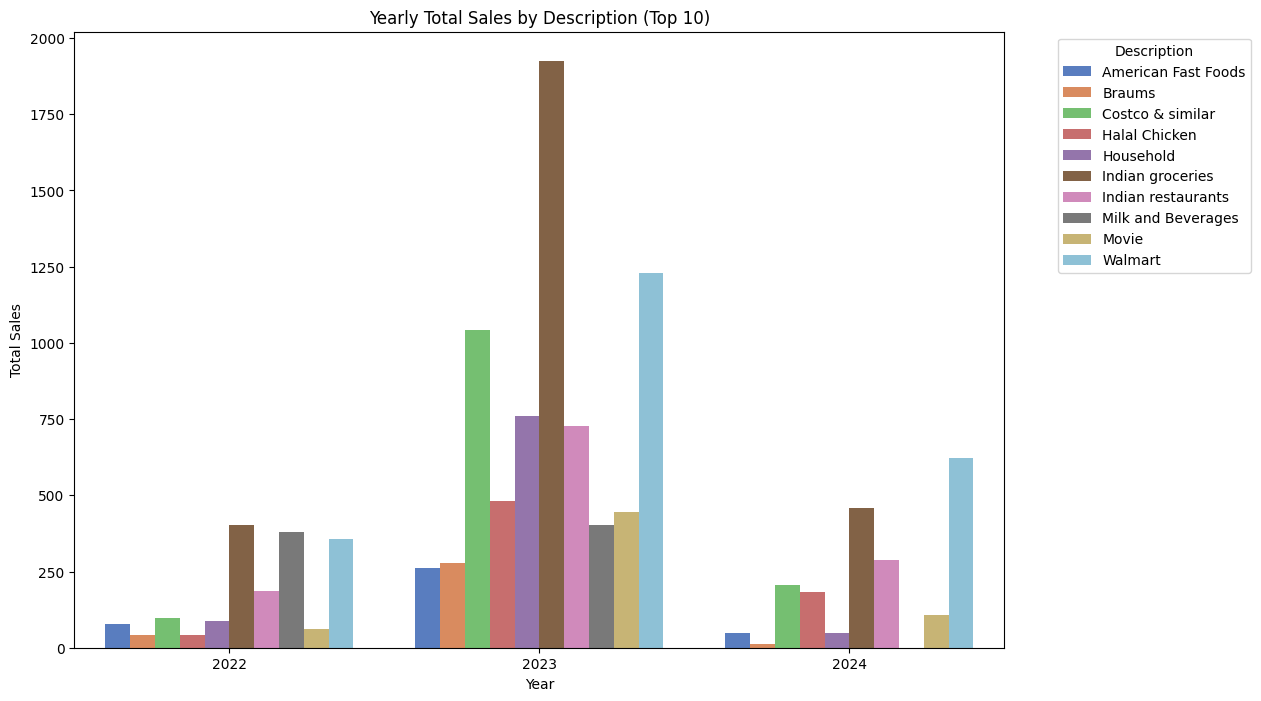

In [81]:

top_10_descriptions = df['Description'].value_counts().head(10).index
df_top_10 = df[df['Description'].isin(top_10_descriptions)]

yearly_top_10 = df_top_10.groupby(['Year', 'Description'])['Cost'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=yearly_top_10, x='Year', y='Cost', hue='Description', palette='muted')
plt.title('Yearly Total Sales by Description (Top 10)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
